# Contenido del proyecto <a id='back'></a>

* [Introducción](#intro)
* [Información general de los datos](#información)
* [Preprocesamiento de datos](#preprocesamiento)
* [Análisis de la información](#análisis)
    * [Priorización de hipótesis](#priorización)
    * [Análisis test A/B](#test)
    * [Conclusiones](#conclusiones)

# Introducción <a id='intro'></a>

Basados en una base de datos de una tienda en línea, inicialmente se analizarán y priorizarán las listas de hipótesis que podrían ayudar a aumentar los ingresos en la tienda. Posteriormente, se realizará un test A/B y finalmente se analizarán los respectivos resultados.

# Información general de los datos <a id='información'></a>

Inicialmente se cargan las librerías necesarias.

In [353]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math

**Se carga el primer dataset.**

In [354]:
hipotesis=pd.read_csv('/datasets/hypotheses_us.csv',sep=';') #Descargamos la información que contiene los datos de las hipótesis.

In [355]:
hipotesis.head(9)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


Se identifica que el mayor alcance se manifiesta en la hipótesis 8. 

El mayor impacto se manifiesta en la hipótesis 1

El mayor esfuerzo se manifiesta para la hipótesis 2.

Se identifica la necesidad de renombrar los nombres de las columnas para facilitar la manipulación de los datos.

In [356]:
hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


No se identifica la necesidad de cambiar los tipos de datos en las columnas que componen el datasets "hipotesis"

In [357]:
hipotesis['Hypothesis'].unique() # Se identifican la información completa de cada una de las hipótesis.

array(['Add two new channels for attracting traffic. This will bring 30% more users',
       'Launch your own delivery service. This will shorten delivery time',
       "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size",
       'Change the category structure. This will increase conversion since users will find the products they want more quickly',
       'Change the background color on the main page. This will increase user engagement',
       'Add a customer review page. This will increase the number of orders',
       'Show banners with current offers and sales on the main page. This will boost conversion',
       'Add a subscription form to all the main pages. This will help you compile a mailing list',
       'Launch a promotion that gives users discounts on their birthdays'],
      dtype=object)

**Las hipótesis que se plantean son las siguientes:**

1. Agregar dos nuevos canales para atraer tráfico. Esto atraerá un 30% mas de usuarios.

2. Lanzar un servicio propio de entrega. Esto disminuirá el tiempo de entrega.

3. Agregar bloques de recomendación de producto al sitio de la tienda. Esto atraerá incremento de conversión y tamaño promedio de compra.

4. Cambiar la estructura de categorías. Esto incrementará la conversión ya que los usuarios encontrarán los productos que buscan mas rápidamente.

5. Cambiar el color de fondo en la página, esto incrementará la participación de los usuarios.

6. Agregar una página de revisión del cliente. Esto aumentará el número de pedidos.

7. Mostrar banners con ofertas y rebajas actuales en la página principal. Esto impulsará la conversión.

8. Añade un formulario de suscripción . Esto ayudará a compilar una lista de correos.

9. Lanzar una promoción que otorga a los usuarios descuentos de cumpleaños.

**Descargamos el segundo Dataset**

In [358]:
orders=pd.read_csv('/datasets/orders_us.csv') #Descargamos el datasets que contiene la información de los pedidos.

In [359]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [360]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


No se identifican datos ausentes.

In [361]:
orders.duplicated().sum()

0

No se identifican datos duplicados

No se identifica la necesidad de renombrar los nombres de las columnas

Se considera que el tipo de dato de las columnas transactionId y visitorId deben encontrarse en tipo object. El tipo de dato para la columna date debe encontrarse en tipo fecha para facilitar el análisis de los datos y prevenir posibles errores.

Se identifican la existencia usuarios que aparecen tanto en el grupo A como en el grupo B.

In [362]:
orders.groupby('visitorId').agg({'group':'unique'})

,group
visitorId,
5114589,[B]
6958315,[B]
8300375,"[B, A]"
11685486,[A]
39475350,[B]
...,...
4266935830,"[A, B]"
4278982564,[A]
4279090005,[B]


Se identifica, que efectivamente hay usuarios que aparecen en ambos grupos.

**Descargamos el tercer datasets**

In [363]:
visits=pd.read_csv('/datasets/visits_us.csv') #Descargamos el datasets que contiene la información de las visitas.

In [364]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [365]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


No se identifican valores ausentes.

Se identifica la necesidad de cambiar el tipo de dato de la columna "date" a formato tipo fecha.

In [366]:
visits.duplicated().sum()

0

No se identifican valores duplicados.

# Preprocesamiento de datos <a id='preprocesamiento'></a>

Inicialmente renombrados los nombres de la columna del datasets "hipótesis"

**Cambiamos los nombres de todas las columnas del datasets "hipótesis" a minúsculas.**

In [367]:
hipotesis=hipotesis.rename(columns={
    'Hypothesis':'hypothesis',
    'Reach': 'reach',
    'Impact':'impact',
    'Confidence':'confidence',
    'Effort':'effort'
})

In [368]:
hipotesis.columns # se verifica el cambio en los nombres de las columnas.

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>

Muy buen trabajo!
</div>

**Se cambian los tipos de datos del datasets "orders"**

Los tipos de datos de las columnas transactionId y visitorId se considera que deben cambiarse a tipo object.

In [369]:
orders['transactionId']=orders['transactionId'].astype('object')

In [370]:
orders['visitorId']=orders['visitorId'].astype('object')

El tipo de dato de la columna date se cambia a tipo fecha.

In [371]:
orders['date']=orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [372]:
orders.info() #Se verifica nuevamente el dataset orders.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   object        
 1   visitorId      1197 non-null   object        
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 46.9+ KB


**Eliminamos las filas que tienen los usuarios que se encuentran tanto en el grupo A como en el grupo B.**

Inicialmente hacemos un conteo con la cantidad de veces que aparece un mismo usuario en cada grupo.

In [373]:
group_count=orders.groupby('visitorId').agg({'group':'nunique'}).reset_index()

In [374]:
group_count

,visitorId,group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


Identificamos la cantidad de usuarios que se reportan varias veces en los conteos de los grupos.

In [375]:
len(group_count[group_count['group']>1])

58

Se identifica, que 58 de los usuarios se repiten para los grupos A y B. Se decide eliminar a éstos usuarios para prevenir errores en el análisis, teniendo en cuenta además que son pocos usuarios al tenerse en cuenta en la totalidad de usuarios.

Se filtra una nueva tabla con éstos usuarios que aparecen varias veces en el conteo.

In [376]:
group2_count=group_count[group_count['group']>1]

In [377]:
group2_count

,visitorId,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2
84,351125977,2
97,393266494,2
114,457167155,2
119,471551937,2
122,477780734,2


Definimos un nuevo dataframe orders, que contenga sólo los usuarios que no aparecen varias veces en el conteo.

In [378]:
orders=orders[~orders['visitorId'].isin(group2_count['visitorId'])]

In [379]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [380]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   object        
 1   visitorId      1016 non-null   object        
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 47.6+ KB


**Se cambian los tipos de datos del datasets "visits"**

In [381]:
visits['date']=visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [382]:
visits.info() # Se verifica nuevamente el datasets visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


# Análisis de la información <a id='análisis'></a>

# Priorización de hipótesis <a id='priorización'></a>

Inicialmente aplicamos el modelo ICE para priorizar las hipótesis.

En el datasets "hipótesis" creamos una nueva columna llamada ICE.

In [383]:
hipotesis['ICE']=(hipotesis['impact']*hipotesis['confidence'])/hipotesis['effort']
hipotesis[['hypothesis','ICE']].sort_values(by='ICE',ascending=False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


Generamos un diagrama de barras para visualizar el ICE para cada hipótesis.

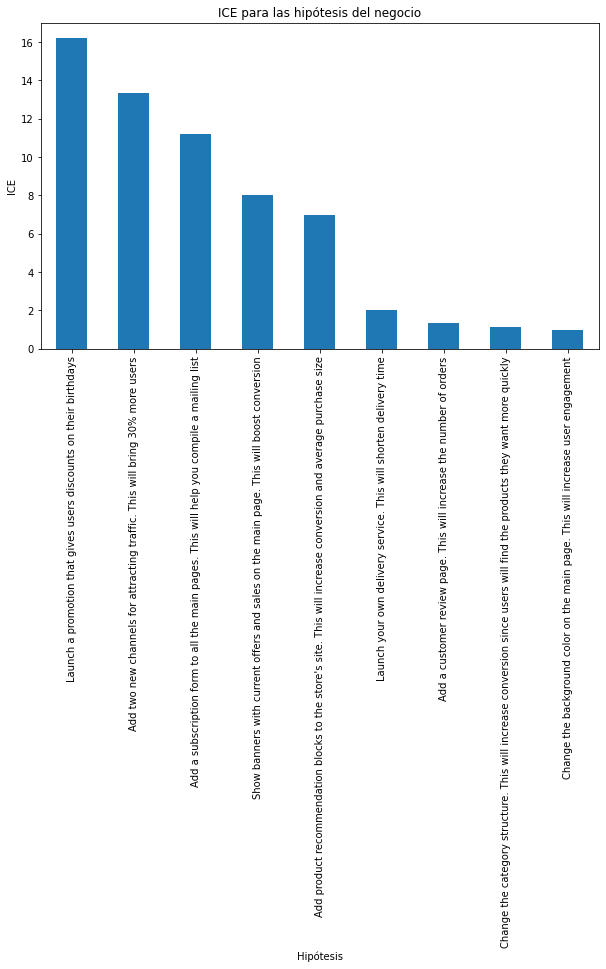

In [384]:
hipotesis.groupby('hypothesis')['ICE'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,6))
plt.title('ICE para las hipótesis del negocio')
plt.xlabel('Hipótesis')
plt.ylabel('ICE')
plt.show()

De acuerdo al diagrama de barras, se identifica que las hipótesis con mayor priorización (según el modelo ICE) son las hipótesis 9, 1 y 8, según las cuales se manifiesta que otorgar promociones a los usuarios en su cumpleaños (9), agregar dos nuevos canales para atraer tráfico (1) y añadir un formulario de suscripción para compilar correos (8) son las hipótesis que podrían ayudar a aumentar los ingresos.

Aplicamos el modelo RICE para priorizar las hipótesis.

In [385]:
hipotesis['RICE']=(hipotesis['reach']*hipotesis['impact']*hipotesis['confidence'])/hipotesis['effort']
hipotesis[['hypothesis','RICE']].sort_values(by='RICE',ascending=False)

,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


Generamos un diagrama de barras para visualizar el RICE para cada hipótesis.

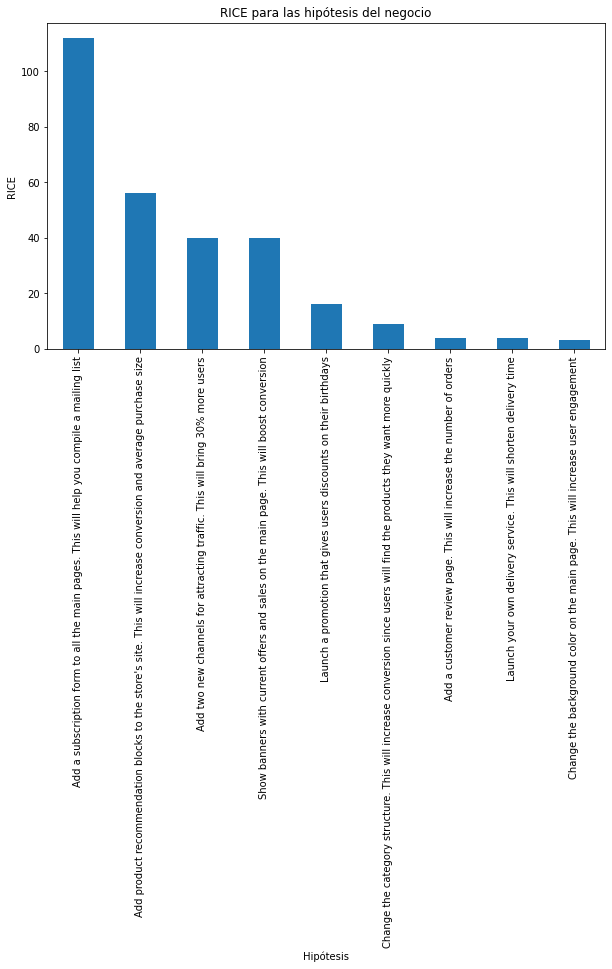

In [386]:
hipotesis.groupby('hypothesis')['RICE'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,6))
plt.title('RICE para las hipótesis del negocio')
plt.xlabel('Hipótesis')
plt.ylabel('RICE')
plt.show()

De acuerdo al diagrama de barras, se identifica que las hipótesis con mayor priorización (según el modelo RICE) son las hipótesis 8, 3 y 1, según las cuales se manifiesta que añadir un formulario de suscripción para compilar correos (8), Agregar bloques de recomendación de producto al sitio de la tienda (3) y agregar dos nuevos canales para atraer tráfico (1) podría ayudar a aumentar los ingresos.

De acuerdo a los gráficos de barras, las hipótesis que se repiten en ambos métodos como priorizadas son las hipótesis 1 y 8, según las cuales añadir un formulario de suscripción para compilar correos (8) o agregar dos nuevos canales para atraer tráfico (1) podrían generar mayores ingresos. Para el método ICE la hipótesis 1 se encuentra mas priorizada que en el método RICE. Para el caso del método RICE, la hipótesis 8 se encuentra mas priorizada que en el método ICE.

# Test A/B <a id='test'></a>

**Inicialmente identificamos los ingresos acumulados por grupo.**

Se crea un nuevo Dataframe que contenga parejas de valores únicos de 'date' y 'group' de la tabla orders.

In [387]:
datesgroups=orders[['date','group']].drop_duplicates() #eliminamos los duplicados para obtener los valores únicos.

Identificamos los pedidos acumulados.

In [388]:
ordersaggregates=datesgroups.apply(
    lambda x:orders[
        np.logical_and(
        orders['date'] <= x['date'],orders['group']==x['group']
        )
    ].agg(
    {
        'date':'max',
        'group':'max',
        'transactionId': pd.Series.nunique,
        'visitorId': pd.Series.nunique,
        'revenue':'sum'
    }
    ),
    axis=1,
).sort_values(by=['date','group'])

identificamos las visitas acumuladas.

In [389]:
visitsaggregates=datesgroups.apply(
    lambda x:visits[
        np.logical_and(
        visits['date'] <= x['date'],visits['group']==x['group']
        )
    ].agg(
    {
        'date':'max',
        'group':'max',
        'visits':'sum'
    }
    ),
    axis=1,
).sort_values(by=['date','group'])

Generamos un nuevo dataframe, que contenga la unión entre los pedidos acumulados y las visitas acumuladas.

In [390]:
cumulativedata=ordersaggregates.merge(visitsaggregates, left_on=['date','group'], right_on=['date','group'])

cumulativedata.columns=[
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors'
]

Se generan las variables que almacenan las fechas, ingresos y número de pedidos para cada grupo del test.

In [391]:
cumulativerevenueA=cumulativedata[cumulativedata['group']=='A'][['date','revenue','orders']] #Datos acumulados para el grupo A

In [392]:
cumulativerevenueB=cumulativedata[cumulativedata['group']=='B'][['date','revenue','orders']] #Datos acumulados para el grupo B

Trazamos un gráfico de ingresos acumulados para el grupo A y B, para visualizar las diferencias entre ambos grupos.

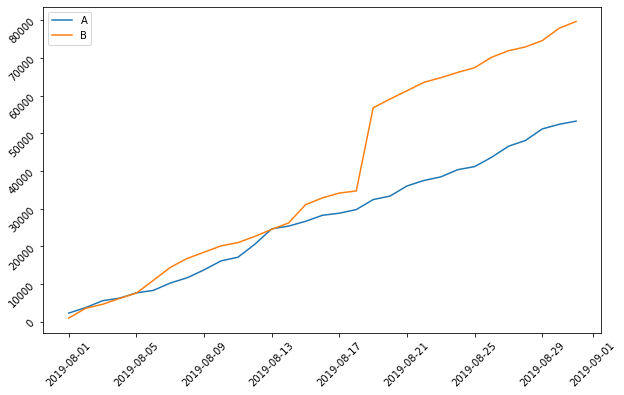

In [393]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.plot(cumulativerevenueA['date'],cumulativerevenueA['revenue'],label='A')
plt.plot(cumulativerevenueB['date'],cumulativerevenueB['revenue'],label='B')
plt.legend()
plt.show()

De acuerdo con el gráfico, se evidencian mejores resultados para los ingresos del grupo B.

Se genera un gráfico que muestre la diferencia relativa en el tamaño de compra promedio.

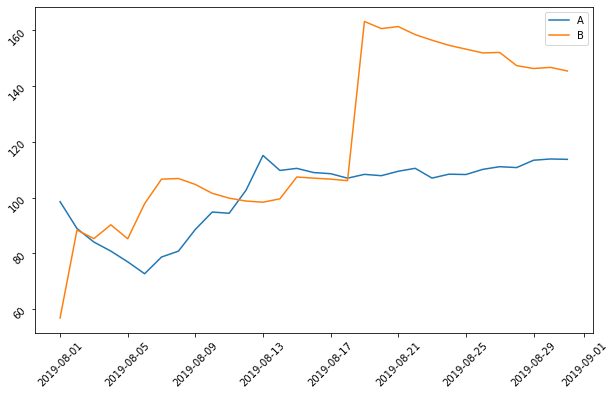

In [431]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.plot(cumulativerevenueA['date'],cumulativerevenueA['revenue']/cumulativerevenueA['orders'],label='A')
plt.plot(cumulativerevenueB['date'],cumulativerevenueB['revenue']/cumulativerevenueB['orders'],label='B')
plt.legend()
plt.show()

De acuerdo con el gráfico, se muestra que inicialmente en el grupo A se tenían mejores ingresos; sin embargo mas adelante los ingresos del grupo B fueron mejores que los del grupo A. Al final en el grupo B se observan mejores resultados.

Unimos los datos acumulados para ambos grupos.

**Se representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.**

Unimos los datos acumulados para cada grupo del test.

In [395]:
cumulativerevenuegroup=cumulativerevenueA.merge(cumulativerevenueB, left_on='date',right_on='date',how='left',suffixes=['A','B'])

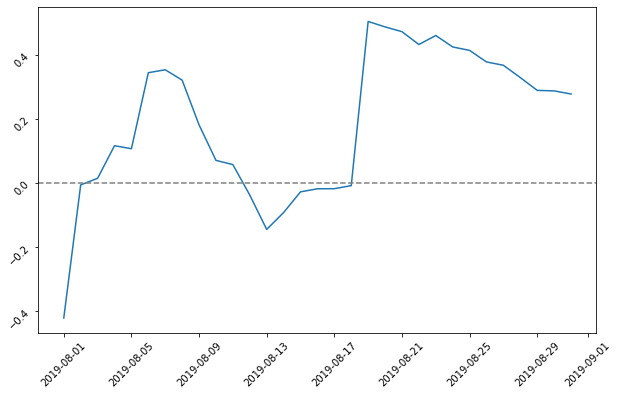

In [396]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.plot(cumulativerevenuegroup['date'],
         (cumulativerevenuegroup['revenueB']/cumulativerevenuegroup['ordersB'])/(cumulativerevenuegroup['revenueA']/cumulativerevenuegroup['ordersA'])-1)
plt.axhline(y=0,color='grey',linestyle='--')
plt.show()

De acuerdo con el gráfico que nos muestra la diferencia relativa entre el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A, se evidencia que el grupo B generalmente se encuentra por encima del grupo A; sin embargo a mitad de la prueba se evidencian pérdidas para el grupo B en comparación con el grupo A.

**Se calcula la tasa de conversión de cada grupo, para lo cual se toma en cuenta la relación entre los pedidos y el número de visitas de cada día**

In [397]:
cumulativedata['conversion']=cumulativedata['orders']/cumulativedata['visitors']

In [398]:
cumulativedataA=cumulativedata[cumulativedata['group']=='A']

In [399]:
cumulativedataA.head(5)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
2,2019-08-02,A,42,36,3734.9,1338,0.031390
4,2019-08-03,A,66,60,5550.1,1845,0.035772
6,2019-08-04,A,77,71,6225.6,2562,0.030055
8,2019-08-05,A,99,92,7623.6,3318,0.029837


In [400]:
cumulativedataB=cumulativedata[cumulativedata['group']=='B']

In [401]:
cumulativedataB.head(5)

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,17,17,967.2,713,0.023843
3,2019-08-02,B,40,39,3535.3,1294,0.030912
5,2019-08-03,B,54,53,4606.9,1803,0.029950
7,2019-08-04,B,68,66,6138.5,2573,0.026428
9,2019-08-05,B,89,87,7587.8,3280,0.027134


**Se representan gráficamente las tasas de conversión diarias de ambos grupos**

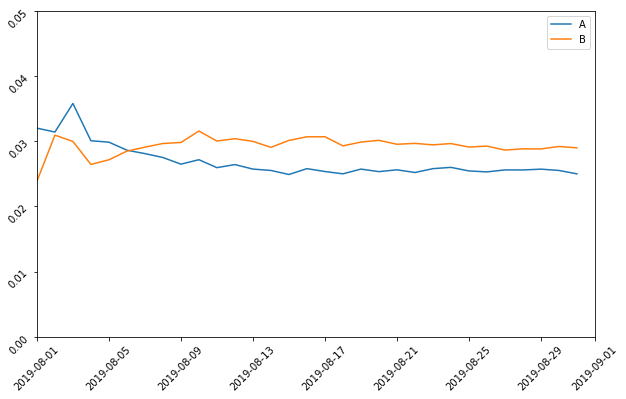

In [402]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.plot(cumulativedataA['date'],cumulativedataA['conversion'],label='A')
plt.plot(cumulativedataB['date'],cumulativedataB['conversion'],label='B')
plt.legend()

plt.axis([pd.to_datetime('2019-08-01'),pd.to_datetime('2019-09-01'),0,0.05])
plt.show()

De acuerdo con el gráfico que representa las tasas de conversión diarias para ambos grupos, se identifica que las cantidades de pedidos por parte de los usuarios, inicialmente fueron mayores para el grupo A y posteriomente se tuvieron mayores pedidos por parte de los usuarios del grupo B. 

**Se traza un gráfico de dispersión del número de pedidos por usuario**

Inicialmente encontramos el número de pedidos por usuario.

In [403]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   object        
 1   visitorId      1016 non-null   object        
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 47.6+ KB


In [404]:
ordersbyusers=(orders.drop(['group','revenue','date'],axis=1)
.groupby('visitorId',as_index=False)
.agg({'transactionId':pd.Series.nunique})
              )

In [405]:
ordersbyusers.columns=['userId','orders']

In [406]:
ordersbyusers.sort_values(by='orders',ascending=False)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
...,...,...
331,1438226485,1
332,1452540367,1
333,1455323168,1
334,1455861274,1


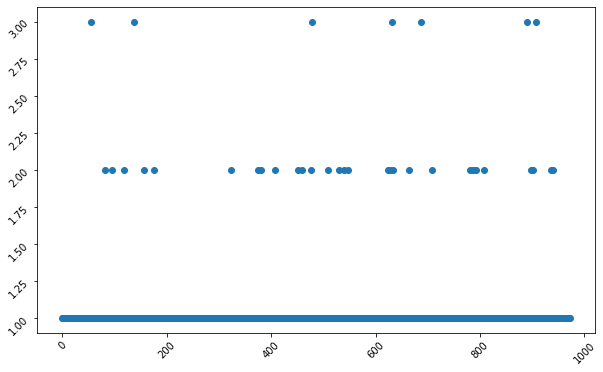

In [407]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
x_values=pd.Series(range(0,len(ordersbyusers)))
plt.scatter(x_values,ordersbyusers['orders'])
plt.show()

De acuerdo con el gráfico de dispersión, la mayoría de los usuarios han realizado solo un pedido.

**Calculamos los percentiles 95 y 99 para el número de pedidos**

In [408]:
np.percentile(ordersbyusers['orders'],[95,99])

array([1., 2.])

Al hallar los percentiles 95 y 99, se evidencia que no mas del 5% de los usuarios realizan sólo un pedido y no mas del 1% realizan 2 pedidos.

**Se traza un gráfico de dispersión de los precios de los pedidos**

Inicialmente se organizan los ingresos de los pedidos en orden descendente.

In [409]:
orders.sort_values(by='revenue',ascending=False)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
1196,3936777065,2108080724,2019-08-15,3120.1,B
1136,666610489,1307669133,2019-08-13,1425.8,A
744,3668308183,888512513,2019-08-27,1335.6,B
743,3603576309,4133034833,2019-08-09,1050.0,A
...,...,...,...,...,...
414,2505918657,2524310328,2019-08-06,5.2,B
908,3352225027,1807547430,2019-08-05,5.2,B
404,2052514069,1995481842,2019-08-28,5.1,B
602,2356264591,1224903511,2019-08-09,5.1,A


**Generamos el gráfico de dispersión**

In [410]:
x_values2=pd.Series(range(0, len(orders['revenue'])))

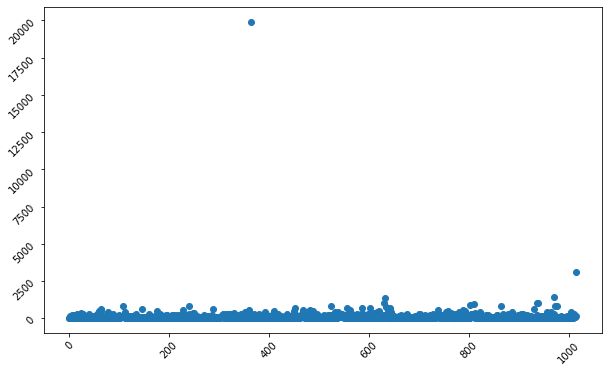

In [411]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.scatter(x_values2,orders['revenue'])
plt.show()

De acuerdo con el gráfico de dispersión que muestra los ingresos de los pedidos, se evidencia que la mayoría son ingresos menores a 2500.

**Calculamos los percentiles 95 y 99 de los precios de los pedidos.**

In [412]:
np.percentile(orders['revenue'],[95,99])

array([414.275, 830.3  ])

De acuerdo con los percentiles 95 y 99 de los ingresos de los pedidos, no mas del 5% de los valores de los pedidos son mayores a 435.54, y no mas del 1% de los pedidos tienen costos  de mas de 830.3.

**Se encuentra la significancia estadística de la diferencia en la conversión entre los grupos (sin filtrar los datos).**

In [413]:
orders_groupA=(orders[orders['group']=='A'].groupby('visitorId',as_index=False).agg({'transactionId': pd.Series.nunique}))

In [414]:
orders_groupA

,visitorId,transactionId
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1
...,...,...
440,4227830084,1
441,4237561104,1
442,4243832526,1
443,4259830713,1


In [415]:
orders_groupB=(orders[orders['group']=='B'].groupby('visitorId',as_index=False).agg({'transactionId': pd.Series.nunique}))

In [416]:
orders_groupB

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1
...,...,...
523,4251115836,1
524,4258103007,1
525,4279090005,1
526,4281247801,1


In [417]:
sampleA=pd.concat(
    [orders_groupA['transactionId'],
     pd.Series(
     0,
     index=np.arange(
     visits[visits['group']=='A']['visits'].sum()
     -len(orders_groupA['transactionId'])
     ),
     name='transactionId'),
    ],
    axis=0
)


In [418]:
sampleB=pd.concat(
    [orders_groupB['transactionId'],
     pd.Series(
     0,
     index=np.arange(
     visits[visits['group']=='B']['visits'].sum()
     -len(orders_groupB['transactionId'])
     ),
     name='transactionId'),
    ],
    axis=0
)

In [419]:
'{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1])

'0.011'

De acuerdo al análisis de los datos (sin procesar), se concluye que las tasas de conversión de los grupos tienen diferencias estadícticamente significativas.

**Calculamos la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos sin procesar**

In [420]:
'{0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'],
    orders[orders['group']=='B']['revenue'])[1])

'0.862'

De acuerdo al análisis de los datos (sin procesar), se concluye que no existen diferencias estadísticamente significativas entre los tamaños promedio de pedido entre los grupos.

**Encontramos la significancia estadística de la diferencia en la conversión entre los grupos (con datos filtrados).**

Inicialmente se filtran los datos anómalos entre los datos.

In [421]:
userswithmanyorders=pd.concat(
    [orders_groupA[orders_groupA['transactionId']>1]
    ['visitorId'],orders_groupB[orders_groupB['transactionId']>1]['visitorId']],axis=0)


In [422]:
expensiveorders=pd.concat(
    [orders[orders['revenue']>600]['visitorId']])

In [423]:
anormals=(
pd.concat([userswithmanyorders, expensiveorders],axis=0)
.drop_duplicates()
.sort_values())

In [424]:
anormals.head()

1099    148427295
33      249864742
684     358944393
36      366673373
648     382846391
Name: visitorId, dtype: object

Se filtran los datos que se consideran anómalos.

In [425]:
samplefilteredA=pd.concat(
    [orders_groupA[np.logical_not(orders_groupA['transactionId'].isin(anormals))]['transactionId'],
     pd.Series(
     0,
     index=np.arange(
     visits[visits['group']=='A']['visits'].sum()
     -len(orders_groupA['transactionId'])
     ),
     name='transactionId'),
    ],
    axis=0
)

In [426]:
samplefilteredB=pd.concat(
    [orders_groupB[np.logical_not(orders_groupB['transactionId'].isin(anormals))]['transactionId'],
     pd.Series(
     0,
     index=np.arange(
     visits[visits['group']=='B']['visits'].sum()
     -len(orders_groupB['transactionId'])
     ),
     name='transactionId'),
    ],
    axis=0
)

**Hallamos la significancia estadística de la diferencia en la conversión entre los grupos (teniendo en cuenta los datos filtrados).**

In [427]:
'{0:.3f}'.format(stats.mannwhitneyu(samplefilteredA, samplefilteredB)[1])

'0.011'

De acuerdo al análisis de los datos (procesados), se concluye que las tasas de conversión de los grupos continúan teniendo diferencias estadísticamente significativas.

**Se halla la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos(teniendo en cuenta los datos filtrados).**

In [428]:
'{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
    orders['group']=='A',np.logical_not(orders['visitorId'].isin(anormals)))]['revenue'],
    orders[np.logical_and(
    orders['group']=='B',np.logical_not(orders['visitorId'].isin(anormals)))]['revenue'])[1])
   

'0.834'

Aún sin los datos anómalos se sigue evidenciando que no existe una diferencia estadísticamente significativa entre los tamaños de pedido promedio de los grupos.

**De acuerdo a la prueba test A/B no existen entonces diferencias significativas entre los tamaños promedio de los grupos, sin embargo, si se considera que existe diferencia estadísticamente significativa entre las tasas de conversión de los grupos; conluyendo entonces que para el grupo B se manifiestan mejores resultados.**

# Conclusiones <a id='conclusiones'></a>

Inicialmente, se identifica mayor alcance en la hipótesis 8.

El mayor impacto se manifiesta en la hipótesis 1.

El mayor esfuerzo se manifiesta en la hipótesis 2.

Se identifica la necesidad de renombrar algunos de los nombres de las columnas de los datasets, para facilitar la manipulación de la información.

No se identificaron datos ausentes o duplicados en los datasets.

En el datasets “orders” se modifican los tipos de datos en las columnas transactionId, visitorId y date; los cuales se cambian a tipo object y tipo fecha para la columna date.

Se identificaron algunos usuarios que aparecían tanto en el grupo A como en el grupo B; los cuales fueron eliminados teniendo en cuenta que se consideraban pocos usuarios entre la totalidad de usuarios que componían la base de datos.

Las hipótesis con mayor priorización (según el modelo ICE) son las hipótesis 9, 1 y 8, según las cuales se manifiesta que otorgar promociones a los usuarios en su cumpleaños (9), agregar dos nuevos canales para atraer tráfico (1) y añadir un formulario de suscripción para compilar correos (8) son las hipótesis que podrían ayudar a aumentar los ingresos.

Las hipótesis con mayor priorización (según el modelo RICE) son las hipótesis 8, 3 y 1, según las cuales se manifiesta que añadir un formulario de suscripción para compilar correos (8), Agregar bloques de recomendación de producto al sitio de la tienda (3) y agregar dos nuevos canales para atraer tráfico (1) podría ayudar a aumentar los ingresos.

Las hipótesis que se repiten en ambos métodos como priorizadas son las hipótesis 1 y 8, según las cuales añadir un formulario de suscripción para compilar correos (8) o agregar dos nuevos canales para atraer tráfico (1) podrían generar mayores ingresos. Para el método ICE la hipótesis 1 se encuentra mas priorizada que en el método RICE. Para el caso del método RICE, la hipótesis 8 se encuentra mas priorizada que en el método ICE.

Test A/B.

Inicialmente, se identifican los ingresos acumulados para los grupos A y B; y se identifican mejores ingresos para el grupo B.
El gráfico que mostraba la diferencia relativa entre los grupos, mostró que inicialmente en el grupo A se tenían mejores ingresos; sin embargo más adelante los ingresos del grupo B fueron mejores que los del grupo A. Al final en el grupo B se observan mejores resultados.

El gráfico de la diferencia relativa entre el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A, mostró que el grupo B generalmente se encuentra por encima del grupo A; sin embargo a mitad de la prueba se evidencian pérdidas para el grupo B en comparación con el grupo A.

De acuerdo con el gráfico que representa las tasas de conversión diarias para ambos grupos, se identifica que las cantidades de pedidos por parte de los usuarios, inicialmente fueron mayores para el grupo A y posteriormente se tuvieron mayores pedidos por parte de los usuarios del grupo B.

De acuerdo con el gráfico de dispersión, la mayoría de los usuarios realizaron solo un pedido.
Al hallar los percentiles 95 y 99 para el número de percentiles por usuario, se evidencia que no mas del 5% y no mas del 1% realizan sólo un pedido.

De acuerdo con el gráfico de dispersión que muestra los ingresos de los pedidos, se evidencia que la mayoría son ingresos menores a 2500.

De acuerdo con los percentiles 95 y 99 de los ingresos de los pedidos, no mas del 5% de los valores de los pedidos son mayores a 435.54, y no mas del 1% de los pedidos tienen costos de mas de 830.3

De acuerdo al análisis de los datos (sin procesar), se concluye que las tasas de conversión de los grupos tienen diferencias estadísticamente significativas.

De acuerdo al análisis de los datos (sin procesar), se concluye que no existen diferencias estadísticamente significativas entre los tamaños promedio de pedido entre los grupos.

De acuerdo al análisis de los datos (procesados), se concluye que las tasas de conversión de los grupos continúan teniendo diferencias estadísticamente significativas.

Aún sin los datos anómalos se sigue evidenciando que no existe una diferencia estadísticamente significativa entre los tamaños de pedido promedio de los grupos.

De acuerdo a la prueba test A/B no existen entonces diferencias significativas entre los tamaños promedio de los grupos, sin embargo, si se considera que existe diferencia estadísticamente significativa entre las tasas de conversión de los grupos; conluyendo entonces que para el grupo se manifiestan mejores resultados.